In [2]:
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import tweepy

In [37]:
consumer_key = "GN2QdOGzHPEErT5mZozR3aHYw"
consumer_secret = "yPtn2YvwGFOl0bulvI2xjRAxrEC4xVO2nV2qgsi3MzkATnYieJ"
access_token = "1649502025418244097-HBuYsNjkSo70qV7JSWOx3BNpyeREnW"
access_token_secret = "9jXlLK5feQG9vilmtoQE6FTE2sImS9y86UoNZOrstZlfQ"

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

# Define search query
search_words = "advertising"
date_since = "2022-01-01"

# Specify number of tweets to retrieve
num_tweets = 1000


In [38]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieve tweets and store in dataframe
tweets = tweepy.Cursor(api.search_tweets,
                       q=search_words,
                       lang="en",
                       since_id=date_since).items(num_tweets)

tweet_list = [[tweet.created_at, tweet.text, tweet.user.screen_name, tweet.user.followers_count] for tweet in tweets]

df = pd.DataFrame(tweet_list, columns=['created_at', 'text', 'user', 'followers_count'])
df

TooManyRequests: ignored

In [7]:
df.to_csv('tweets.csv', index=False)

In [8]:
df = pd.read_csv('tweets.csv')

In [9]:
df

,created_at,text,user,followers_count
0,2023-04-24 23:20:14+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,FrauHeather,77
1,2023-04-24 23:19:22+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,Kat50632766,369
2,2023-04-24 23:18:14+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,betsysewgood,2156
3,2023-04-24 23:17:13+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,chicamialv,143
4,2023-04-24 23:16:59+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,Popeye41886031,57
...,...,...,...,...
995,2023-04-24 18:51:25+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,brady_rants,242
996,2023-04-24 18:51:13+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,Johnmcclieve__,728
997,2023-04-24 18:51:11+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,ex_lefty,1666
998,2023-04-24 18:51:10+00:00,RT @lhfang: Tucker Carlson last week ripped bi...,R3novat1o,52


In [10]:
from google.colab import files
files.download('tweets.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df = df[['text']]


In [12]:
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]','',x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+','',x))


<ipython-input-12-a2ef50fb4539>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]','',x))
<ipython-input-12-a2ef50fb4539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: re.sub(r'\d+','',x))


In [13]:
df['text'] = df['text'].apply(lambda x: x.lower())


<ipython-input-13-98777302f801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower())


In [14]:
df['text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))


<ipython-input-14-a18bb260abeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))


In [15]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])


<ipython-input-15-d1522e2d2a2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: [word for word in x if word not in stop_words])


In [16]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))


<ipython-input-16-6b224a156d82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: ' '.join(x))


In [17]:
df['text']

0      rt lhfang tucker carlson last week ripped big ...
1      rt lhfang tucker carlson last week ripped big ...
2      rt lhfang tucker carlson last week ripped big ...
3      rt lhfang tucker carlson last week ripped big ...
4      rt lhfang tucker carlson last week ripped big ...
                             ...                        
995    rt lhfang tucker carlson last week ripped big ...
996    rt lhfang tucker carlson last week ripped big ...
997    rt lhfang tucker carlson last week ripped big ...
998    rt lhfang tucker carlson last week ripped big ...
999    rt lhfang tucker carlson last week ripped big ...
Name: text, Length: 1000, dtype: object

In [18]:
from collections import Counter

# Count the frequency of each word
word_freq = Counter()
df['text'].str.split().apply(word_freq.update)

# Get the most common words
most_common_words = word_freq.most_common(10)
print(most_common_words)


[('ads', 983), ('rt', 963), ('big', 959), ('tv', 959), ('pharma', 958), ('carlson', 957), ('last', 957), ('dollars', 957), ('news', 957), ('lhfang', 956)]


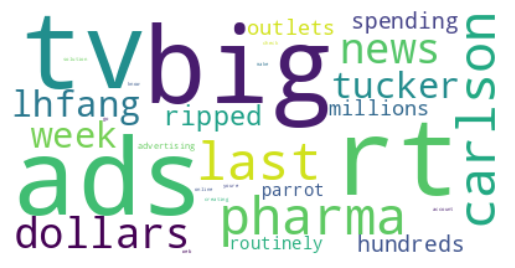

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud
wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


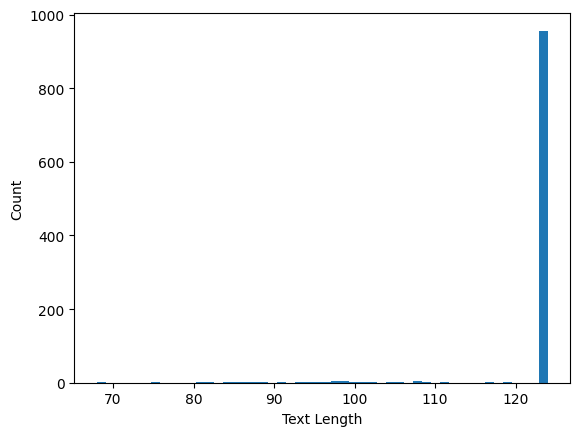

In [20]:
text_length = df['text'].str.len()
plt.hist(text_length, bins=50)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()


In [28]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Perform sentiment analysis
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Convert continuous sentiment scores to categorical labels
df['sentiment'] = df['sentiment'].apply(lambda x: 'positive' if x > 0.5 else 'negative')

df.to_csv('tweets.csv', index=False)



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Read the CSV file into a DataFrame
df = pd.read_csv('tweets.csv')

# Print the first few rows of the DataFrame
print(df.head(30))

                                                 text sentiment
0   rt lhfang tucker carlson last week ripped big ...  negative
1   rt lhfang tucker carlson last week ripped big ...  negative
2   rt lhfang tucker carlson last week ripped big ...  negative
3   rt lhfang tucker carlson last week ripped big ...  negative
4   rt lhfang tucker carlson last week ripped big ...  negative
5   rt lhfang tucker carlson last week ripped big ...  negative
6   rt lhfang tucker carlson last week ripped big ...  negative
7   rt lhfang tucker carlson last week ripped big ...  negative
8   rt lhfang tucker carlson last week ripped big ...  negative
9   rt lhfang tucker carlson last week ripped big ...  negative
10  rt lhfang tucker carlson last week ripped big ...  negative
11  rt lhfang tucker carlson last week ripped big ...  negative
12  rt lhfang tucker carlson last week ripped big ...  negative
13  rt lhfang tucker carlson last week ripped big ...  negative
14  rt lhfang tucker carlson last week r

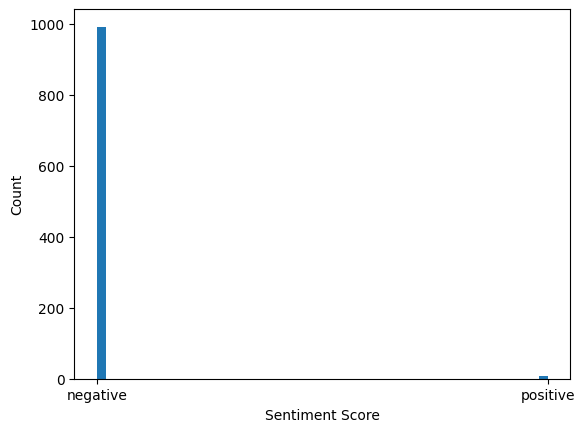

In [30]:
# Plot the sentiment distribution
plt.hist(df['sentiment'], bins=50)
plt.xlabel('Sentiment Score')
plt.ylabel('Count')
plt.show()


In [31]:
print(df[['text', 'sentiment']].head(10))


                                                text sentiment
0  rt lhfang tucker carlson last week ripped big ...  negative
1  rt lhfang tucker carlson last week ripped big ...  negative
2  rt lhfang tucker carlson last week ripped big ...  negative
3  rt lhfang tucker carlson last week ripped big ...  negative
4  rt lhfang tucker carlson last week ripped big ...  negative
5  rt lhfang tucker carlson last week ripped big ...  negative
6  rt lhfang tucker carlson last week ripped big ...  negative
7  rt lhfang tucker carlson last week ripped big ...  negative
8  rt lhfang tucker carlson last week ripped big ...  negative
9  rt lhfang tucker carlson last week ripped big ...  negative


In [32]:
# Analyze sentiments
df['sentiment'] = pd.to_numeric(df['sentiment'], errors='coerce')

positive_tweets = df[df['sentiment'] > 0]
negative_tweets = df[df['sentiment'] < 0]
neutral_tweets = df[df['sentiment'] == 0]

print(f"Number of positive tweets: {len(positive_tweets)}")
print(f"Number of negative tweets: {len(negative_tweets)}")
print(f"Number of neutral tweets: {len(neutral_tweets)}")

Number of positive tweets: 0
Number of negative tweets: 0
Number of neutral tweets: 0


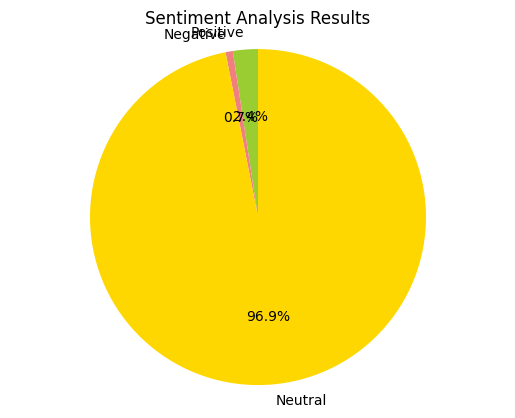

In [26]:
import matplotlib.pyplot as plt

labels = ['Positive', 'Negative', 'Neutral']
sizes = [len(positive_tweets), len(negative_tweets), len(neutral_tweets)]
colors = ['yellowgreen', 'lightcoral', 'gold']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Analysis Results')
plt.show()


In [27]:
# Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the data into a DataFrame
df = pd.read_csv('tweets.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Preprocess the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
y_pred = rf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

# Make predictions on new data
new_data = ['I love this product!', 'This product is good.']
new_data = vectorizer.transform(new_data)
print(rf.predict(new_data))


ValueError: ignored

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data into a DataFrame
df = pd.read_csv('tweets.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Preprocess the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Random Forest model for different values of n_estimators
n_estimators_values = [10, 50, 100, 200, 500]
accuracies = []
for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy vs n_estimators graph
plt.plot(n_estimators_values, accuracies)
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()
